In [540]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use('dark_background') 

In [541]:
data = pd.read_csv('automobileEDA.csv')
data.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


In [542]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

### Checking for duplicates & NaN

In [543]:
dup = data[data.duplicated()]
print(data.isnull().sum())
print(dup)

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64
Empty DataFrame
Columns: [symboling, normalized-losses, make, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price,

### Checking Correlation for the dependent variabl "price" and the rest of the independent variables, After that I drop columns with weak +/- correlation


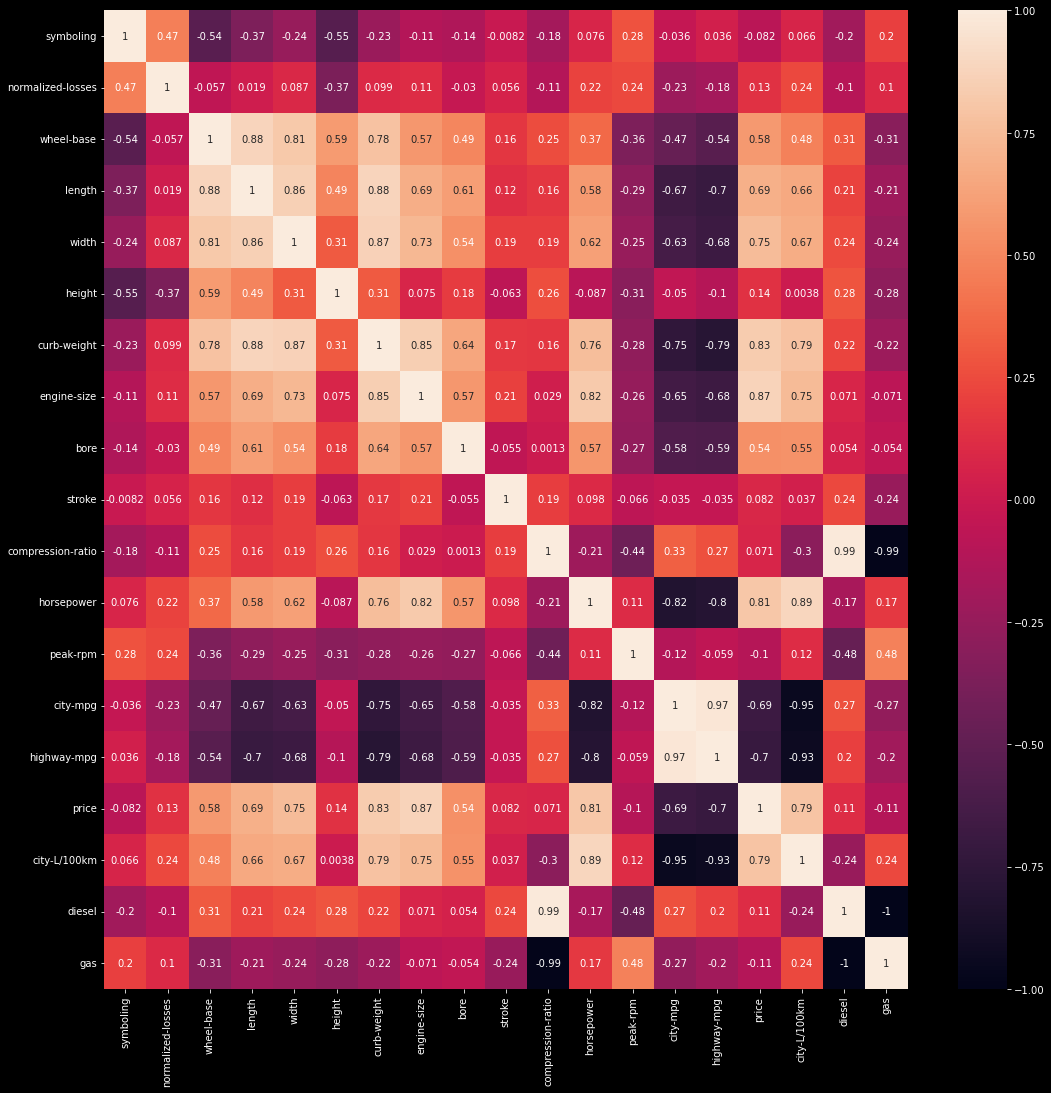

In [544]:
corr = data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True)
plt.show()

In [545]:
corr = data.corr()
corr.price.sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [546]:
data.drop(['engine-type', 'fuel-system', 'stroke', 'symboling','gas','peak-rpm','compression-ratio','diesel','height','normalized-losses'], axis=1, inplace=True)


### Encoding categorical data

In [547]:
data = pd.get_dummies(data, columns=['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'num-of-cylinders','horsepower-binned'], drop_first=True)
data.head(10)

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price,...,drive-wheels_rwd,engine-location_rear,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,horsepower-binned_Low,horsepower-binned_Medium
0,88.6,0.811148,0.890278,2548,130,3.47,111.0,21,27,13495.0,...,1,0,0,1,0,0,0,0,0,1
1,88.6,0.811148,0.890278,2548,130,3.47,111.0,21,27,16500.0,...,1,0,0,1,0,0,0,0,0,1
2,94.5,0.822681,0.909722,2823,152,2.68,154.0,19,26,16500.0,...,1,0,0,0,1,0,0,0,0,1
3,99.8,0.848630,0.919444,2337,109,3.19,102.0,24,30,13950.0,...,0,0,0,1,0,0,0,0,0,1
4,99.4,0.848630,0.922222,2824,136,3.19,115.0,18,22,17450.0,...,0,0,1,0,0,0,0,0,0,1
5,99.8,0.851994,0.920833,2507,136,3.19,110.0,19,25,15250.0,...,0,0,1,0,0,0,0,0,0,1
6,105.8,0.925997,0.991667,2844,136,3.19,110.0,19,25,17710.0,...,0,0,1,0,0,0,0,0,0,1
7,105.8,0.925997,0.991667,2954,136,3.19,110.0,19,25,18920.0,...,0,0,1,0,0,0,0,0,0,1
8,105.8,0.925997,0.991667,3086,131,3.13,140.0,17,20,23875.0,...,0,0,1,0,0,0,0,0,0,1
9,101.2,0.849592,0.900000,2395,108,3.50,101.0,23,29,16430.0,...,1,0,0,1,0,0,0,0,1,0


In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wheel-base                201 non-null    float64
 1   length                    201 non-null    float64
 2   width                     201 non-null    float64
 3   curb-weight               201 non-null    int64  
 4   engine-size               201 non-null    int64  
 5   bore                      201 non-null    float64
 6   horsepower                201 non-null    float64
 7   city-mpg                  201 non-null    int64  
 8   highway-mpg               201 non-null    int64  
 9   price                     201 non-null    float64
 10  city-L/100km              201 non-null    float64
 11  make_audi                 201 non-null    uint8  
 12  make_bmw                  201 non-null    uint8  
 13  make_chevrolet            201 non-null    uint8  
 14  make_dodge

### Box plotting is needed for outlier detection

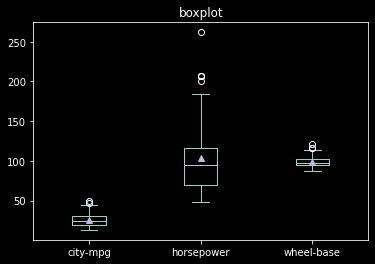

In [549]:
ax = data[['city-mpg', 'horsepower','wheel-base']].plot(kind='box', title='boxplot', showmeans=True)

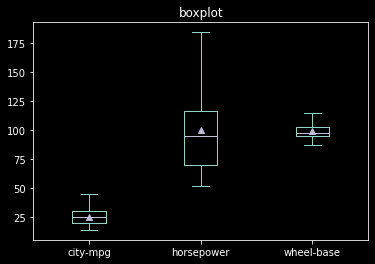

In [550]:
# Independent variables with outliers --> ['horsepower', 'wheel-base','city-mpg'].
# I tried putting the columns in one list but for some reason it changes all the values to NaN.

Q1 = data['horsepower'].quantile(0.25) 
Q3 = data['horsepower'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['horsepower'] < (Q1 - 1.5 * IQR)) |(data['horsepower'] > (Q3 + 1.5 * IQR)))]

Q1 = data['wheel-base'].quantile(0.25) 
Q3 = data['wheel-base'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['wheel-base'] < (Q1 - 1.5 * IQR)) |(data['wheel-base'] > (Q3 + 1.5 * IQR)))]

Q1 = data['city-mpg'].quantile(0.25) 
Q3 = data['city-mpg'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['city-mpg'] < (Q1 - 1.5 * IQR)) |(data['city-mpg'] > (Q3 + 1.5 * IQR)))]

ax = data[['city-mpg', 'horsepower','wheel-base']].plot(kind='box', title='boxplot', showmeans=True)

### Splittin Data into Training and Test

In [551]:
X = data.drop(['price'], axis=1)
Y = data['price']
print(X)

     wheel-base    length     width  curb-weight  engine-size  bore  \
0          88.6  0.811148  0.890278         2548          130  3.47   
1          88.6  0.811148  0.890278         2548          130  3.47   
2          94.5  0.822681  0.909722         2823          152  2.68   
3          99.8  0.848630  0.919444         2337          109  3.19   
4          99.4  0.848630  0.922222         2824          136  3.19   
..          ...       ...       ...          ...          ...   ...   
196       109.1  0.907256  0.956944         2952          141  3.78   
197       109.1  0.907256  0.955556         3049          141  3.78   
198       109.1  0.907256  0.956944         3012          173  3.58   
199       109.1  0.907256  0.956944         3217          145  3.01   
200       109.1  0.907256  0.956944         3062          141  3.78   

     horsepower  city-mpg  highway-mpg  city-L/100km  ...  drive-wheels_rwd  \
0         111.0        21           27     11.190476  ...           

In [552]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 191, dtype: float64


In [553]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2, random_state=2)

### Data Normalization

In [554]:
sc = StandardScaler()

In [555]:
X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Training the data using Linear Regression Model

In [561]:
LinearRegressionModel = LinearRegression()

In [562]:
LinearRegressionModel.fit(X_train, Y_train)

LinearRegression()

In [563]:
X_test_predict = LinearRegressionModel.predict(X_test)

In [564]:
error_score = metrics.r2_score(Y_test, X_test_predict)
print("R2 Score: " ,error_score)

R2 Score:  0.9247818483208436


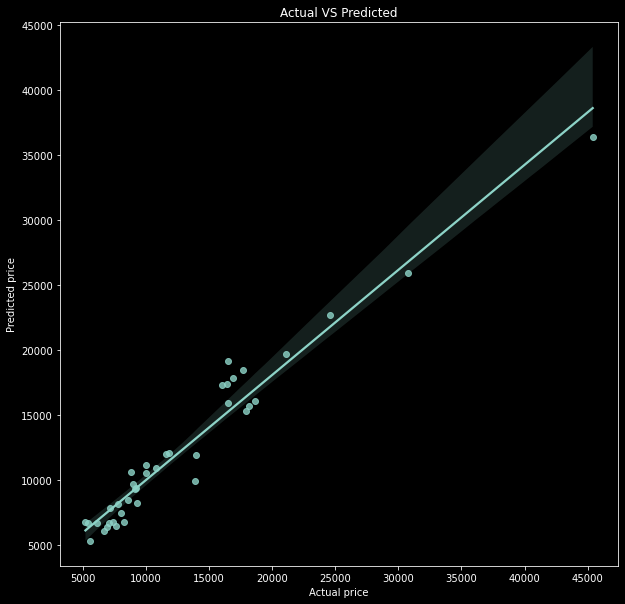

In [565]:
fig, ax = plt.subplots(figsize=(10, 10))



sns.regplot(x=Y_test, y = X_test_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual VS Predicted")
plt.show()